In [368]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [369]:
# Reading in NBA Salary CSV
csv = pd.read_csv('nba_salary.csv')

In [370]:
csv.head()

,name,position,draft_pick,career_ast,career_fg,career_fg3,career_ft,career_g,career_per,career_pts,career_trb,career_ws,career_efg,salary,season_start,season_end
0,Alaa Abdelnaby,Power Forward,25th overall,0.3,50.2,0.0,70.1,256,13.0,5.7,3.3,4.8,50.2,650000,1994,1995
1,Alaa Abdelnaby,Power Forward,25th overall,0.3,50.2,0.0,70.1,256,13.0,5.7,3.3,4.8,50.2,805000,1993,1994
2,Alaa Abdelnaby,Power Forward,25th overall,0.3,50.2,0.0,70.1,256,13.0,5.7,3.3,4.8,50.2,500000,1992,1993
3,Alaa Abdelnaby,Power Forward,25th overall,0.3,50.2,0.0,70.1,256,13.0,5.7,3.3,4.8,50.2,494000,1991,1992
4,Alaa Abdelnaby,Power Forward,25th overall,0.3,50.2,0.0,70.1,256,13.0,5.7,3.3,4.8,50.2,395000,1990,1991


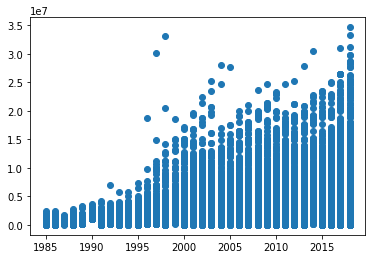

In [371]:
plt.scatter('season_end','salary', data = csv) #visualizing the data
## Upon visualization, we notice outliers between 1997

In [372]:
# Checking for NA values
df = csv
df['career_fg'].isnull().values.any()

True

In [373]:
# Using a loop to identify which columns have missing values
#Finding the columns that have missing values
for col in df:
    if df[col].isnull().values.any() == True:
        print(col)

draft_pick
career_fg
career_fg3
career_ft
career_per
career_efg


In [374]:
#Further selecting rows with no NA values from statlines(Except Draft_position)
df1 = df[np.isfinite(df['career_fg'])]
df2 = df1[np.isfinite(df1['career_fg3'])]
df3 = df2[np.isfinite(df2['career_ft'])]

In [375]:
#Checking for NA values
for col in df3:
    if df3[col].isnull().values.any() == True:
        print(col)

draft_pick


In [376]:
#Filling NA values with "Undrafted"
df_clean = df3.fillna(value = 'undrafted')
df_clean.head()

,name,position,draft_pick,career_ast,career_fg,career_fg3,career_ft,career_g,career_per,career_pts,career_trb,career_ws,career_efg,salary,season_start,season_end
0,Alaa Abdelnaby,Power Forward,25th overall,0.3,50.2,0.0,70.1,256,13.0,5.7,3.3,4.8,50.2,650000,1994,1995
1,Alaa Abdelnaby,Power Forward,25th overall,0.3,50.2,0.0,70.1,256,13.0,5.7,3.3,4.8,50.2,805000,1993,1994
2,Alaa Abdelnaby,Power Forward,25th overall,0.3,50.2,0.0,70.1,256,13.0,5.7,3.3,4.8,50.2,500000,1992,1993
3,Alaa Abdelnaby,Power Forward,25th overall,0.3,50.2,0.0,70.1,256,13.0,5.7,3.3,4.8,50.2,494000,1991,1992
4,Alaa Abdelnaby,Power Forward,25th overall,0.3,50.2,0.0,70.1,256,13.0,5.7,3.3,4.8,50.2,395000,1990,1991


In [377]:
#Importing college stats
college_stats = pd.read_csv('NCAA.csv')

In [378]:
college_stats.head()

,Player,Class,Season,Pos,School,Conf,G,MP,FG,FGA,...,FTA,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Jimmer Fredette,SR,2010-11,G,Brigham Young,MWC,37,1323.0,346,765,...,282,24.0,103.0,127,160,49,1,131.0,49.0,1068
1,Glenn Robinson,JR,1993-94,F,Purdue,Big Ten,34,1166.0,368,762,...,270,NaN,NaN,344,66,56,31,139.0,88.0,1030
2,Chris Clemons,SR,2018-19,G,Campbell,Big South,33,1208.0,304,679,...,283,25.0,142.0,167,94,49,11,84.0,63.0,993
3,Stephen Curry,JR,2008-09,G,Davidson,Southern,34,1145.0,312,687,...,251,21.0,130.0,151,189,86,8,126.0,81.0,974
4,Kemba Walker,JR,2010-11,G,Connecticut,Big East,41,1543.0,316,739,...,315,53.0,170.0,223,184,77,7,93.0,56.0,965


In [379]:
#observing NA values from imported NCAA stats. The complete list has 4998 rows and we can see there are missing values from multiple columns
college_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4998 entries, 0 to 4997
Data columns (total 25 columns):
Player    4998 non-null object
Class     4996 non-null object
Season    4998 non-null object
Pos       4995 non-null object
School    4998 non-null object
Conf      4998 non-null object
G         4998 non-null int64
MP        4182 non-null float64
FG        4998 non-null int64
FGA       4998 non-null int64
2P        4998 non-null int64
2PA       4998 non-null int64
3P        4998 non-null int64
3PA       4998 non-null int64
FT        4998 non-null int64
FTA       4998 non-null int64
ORB       3833 non-null float64
DRB       3833 non-null float64
TRB       4998 non-null int64
AST       4998 non-null int64
STL       4998 non-null int64
BLK       4998 non-null int64
TOV       4273 non-null float64
PF        4313 non-null float64
PTS       4998 non-null int64
dtypes: float64(5), int64(14), object(6)
memory usage: 976.2+ KB


In [380]:
#Dropping NA values
college_updated = college_stats.dropna()

In [381]:
college_updated.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3723 entries, 0 to 4997
Data columns (total 25 columns):
Player    3723 non-null object
Class     3723 non-null object
Season    3723 non-null object
Pos       3723 non-null object
School    3723 non-null object
Conf      3723 non-null object
G         3723 non-null int64
MP        3723 non-null float64
FG        3723 non-null int64
FGA       3723 non-null int64
2P        3723 non-null int64
2PA       3723 non-null int64
3P        3723 non-null int64
3PA       3723 non-null int64
FT        3723 non-null int64
FTA       3723 non-null int64
ORB       3723 non-null float64
DRB       3723 non-null float64
TRB       3723 non-null int64
AST       3723 non-null int64
STL       3723 non-null int64
BLK       3723 non-null int64
TOV       3723 non-null float64
PF        3723 non-null float64
PTS       3723 non-null int64
dtypes: float64(5), int64(14), object(6)
memory usage: 756.2+ KB


In [382]:
#Renaming class to numerical values
year = {'FR': 1, 'SO' : 2, 'JR': 3, 'SR': 4}
college_updated = college_updated.replace({'Class':year})
college_updated.head()

,Player,Class,Season,Pos,School,Conf,G,MP,FG,FGA,...,FTA,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Jimmer Fredette,4,2010-11,G,Brigham Young,MWC,37,1323.0,346,765,...,282,24.0,103.0,127,160,49,1,131.0,49.0,1068
2,Chris Clemons,4,2018-19,G,Campbell,Big South,33,1208.0,304,679,...,283,25.0,142.0,167,94,49,11,84.0,63.0,993
3,Stephen Curry,3,2008-09,G,Davidson,Southern,34,1145.0,312,687,...,251,21.0,130.0,151,189,86,8,126.0,81.0,974
4,Kemba Walker,3,2010-11,G,Connecticut,Big East,41,1543.0,316,739,...,315,53.0,170.0,223,184,77,7,93.0,56.0,965
5,J.J. Redick,4,2005-06,G,Duke,ACC,36,1336.0,302,643,...,256,7.0,64.0,71,95,52,2,90.0,54.0,964


In [383]:
#Using groupby to filter by the last year played
latest_year = college_updated.groupby(['Player'])[['Class']].max()
latest_year = latest_year.reset_index()
#Merging the latest year to college stats by the corresponding year
final_college_stats = latest_year.merge(college_updated)
final_college_stats

,Player,Class,Season,Pos,School,Conf,G,MP,FG,FGA,...,FTA,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,A.D. Vassallo,4,2008-09,G,Virginia Tech,ACC,34,1247.0,232,516,...,121,47.0,164.0,211,88,28,29,85.0,74.0,648
1,A.J. Abrams,4,2008-09,G,Texas,Big 12,35,1319.0,193,484,...,105,14.0,64.0,78,46,47,4,48.0,69.0,580
2,A.J. Davis,3,2011-12,G,James Madison,CAA,32,1038.0,169,387,...,162,38.0,112.0,150,61,55,9,85.0,62.0,510
3,A.J. English,4,2015-16,G,Iona,MAAC,28,1005.0,190,439,...,189,15.0,126.0,141,174,44,14,101.0,60.0,632
4,A.J. Graves,3,2006-07,G,Butler,Horizon,35,1247.0,174,464,...,153,14.0,66.0,80,85,51,2,59.0,55.0,591
5,A.J. Hammons,4,2015-16,C,Purdue,Big Ten,33,813.0,199,336,...,127,77.0,193.0,270,37,9,84,65.0,78.0,494
6,A.J. Ogilvy,1,2007-08,C,Vanderbilt,SEC,34,896.0,201,342,...,229,70.0,159.0,229,40,23,49,85.0,104.0,578
7,A.J. Price,4,2008-09,G,Connecticut,Big East,35,1112.0,170,417,...,129,20.0,102.0,122,164,24,0,94.0,44.0,515
8,A.J. Slaughter,4,2009-10,G,Western Kentucky,Sun Belt,34,1240.0,184,442,...,179,16.0,92.0,108,147,54,4,92.0,63.0,595
9,AJ Brodeur,3,2018-19,F,Pennsylvania,Ivy,31,1007.0,224,424,...,144,63.0,194.0,257,113,30,41,84.0,74.0,547


In [384]:
# Creating a new column that matches latest college season to the rookie year in the NBA
szn = np.empty(len(final_college_stats))

for i in range(0, len(szn)):
    szn[i] = int(str(final_college_stats.iloc[i,2])[:4])
    
szn = szn + 1
szn

array([2009., 2009., 2012., ..., 2016., 2014., 2019.])

In [385]:
#Converting the season type into int
season = szn.astype(int)

In [386]:
#Creating a new column (season)
final_college_stats['season'] = season
final_college_stats.head()
final_college_stats = final_college_stats.drop(['Season'], axis = 1)

In [387]:
final_college_stats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2629 entries, 0 to 2628
Data columns (total 25 columns):
Player    2629 non-null object
Class     2629 non-null int64
Pos       2629 non-null object
School    2629 non-null object
Conf      2629 non-null object
G         2629 non-null int64
MP        2629 non-null float64
FG        2629 non-null int64
FGA       2629 non-null int64
2P        2629 non-null int64
2PA       2629 non-null int64
3P        2629 non-null int64
3PA       2629 non-null int64
FT        2629 non-null int64
FTA       2629 non-null int64
ORB       2629 non-null float64
DRB       2629 non-null float64
TRB       2629 non-null int64
AST       2629 non-null int64
STL       2629 non-null int64
BLK       2629 non-null int64
TOV       2629 non-null float64
PF        2629 non-null float64
PTS       2629 non-null int64
season    2629 non-null int64
dtypes: float64(5), int64(16), object(4)
memory usage: 614.0+ KB


In [388]:
#Filtering by earliest season salaries
earliest_season = df_clean.groupby(['name'])[['season_start','salary']].min()
earliest_NBA_season = earliest_season.reset_index()
earliest_NBA_season.head()

,name,season_start,salary
0,A.C. Green,1985,128750
1,A.J. English,1990,150000
2,A.J. Guyton,2000,18748
3,A.J. Hammons,2016,650000
4,A.J. Price,2009,62552


In [389]:
#Selecting rows that earliest season starts after 1990
NBA_salary = earliest_NBA_season.query('season_start > 1990')
NBA_salary.reset_index()
NBA_salary.head()

,name,season_start,salary
2,A.J. Guyton,2000,18748
3,A.J. Hammons,2016,650000
4,A.J. Price,2009,62552
6,Aaron Brooks,2007,972720
7,Aaron Gordon,2014,3992040


In [390]:
#Renaming the columns 
NBA_salary.columns = ['Player', 'season', 'NBA_Salary']
NBA_salary.head()

,Player,season,NBA_Salary
2,A.J. Guyton,2000,18748
3,A.J. Hammons,2016,650000
4,A.J. Price,2009,62552
6,Aaron Brooks,2007,972720
7,Aaron Gordon,2014,3992040


In [391]:
Final = NBA_salary.merge(final_college_stats)
Final.head()

,Player,season,NBA_Salary,Class,Pos,School,Conf,G,MP,FG,...,FTA,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,A.J. Hammons,2016,650000,4,C,Purdue,Big Ten,33,813.0,199,...,127,77.0,193.0,270,37,9,84,65.0,78.0,494
1,A.J. Price,2009,62552,4,G,Connecticut,Big East,35,1112.0,170,...,129,20.0,102.0,122,164,24,0,94.0,44.0,515
2,Aaron Brooks,2007,972720,4,G,Oregon,Pac-10,35,1289.0,213,...,136,31.0,118.0,149,149,48,6,89.0,88.0,621
3,Aaron Gray,2007,427163,4,C,Pittsburgh,Big East,36,1016.0,204,...,166,120.0,221.0,341,61,15,62,55.0,91.0,499
4,Acie Law,2007,203057,4,G,Texas A&M,Big 12,34,1153.0,216,...,185,8.0,105.0,113,169,39,1,88.0,83.0,614


In [392]:
#Added per game stats and season long percentages to contextualize season-long stats.
#This normalizes for unexpected shortened seasons 
Final['PPG'] = Final['PTS']/Final['G']
Final['APG'] = Final['AST']/Final['G']
Final['TRB/G'] = Final['TRB']/Final['G']
Final['STL/G'] = Final['STL']/Final['G']
Final['TOV/G'] = Final['TOV']/Final['G']
Final['BLK/G'] = Final['BLK']/Final['G']
Final['3P%'] = Final['3P']/Final['3PA']
Final['FG%'] = Final['FG']/Final['FGA']
Final['eFG%'] = (Final['FG'] + (0.5* Final['3P']))/Final['FGA']
Final.head()

,Player,season,NBA_Salary,Class,Pos,School,Conf,G,MP,FG,...,PTS,PPG,APG,TRB/G,STL/G,TOV/G,BLK/G,3P%,FG%,eFG%
0,A.J. Hammons,2016,650000,4,C,Purdue,Big Ten,33,813.0,199,...,494,14.969697,1.121212,8.181818,0.272727,1.969697,2.545455,0.545455,0.592262,0.601190
1,A.J. Price,2009,62552,4,G,Connecticut,Big East,35,1112.0,170,...,515,14.714286,4.685714,3.485714,0.685714,2.685714,0.000000,0.401961,0.407674,0.505995
2,Aaron Brooks,2007,972720,4,G,Oregon,Pac-10,35,1289.0,213,...,621,17.742857,4.257143,4.257143,1.371429,2.542857,0.171429,0.404040,0.460043,0.546436
3,Aaron Gray,2007,427163,4,C,Pittsburgh,Big East,36,1016.0,204,...,499,13.861111,1.694444,9.472222,0.416667,1.527778,1.722222,NaN,0.565097,0.565097
4,Acie Law,2007,203057,4,G,Texas A&M,Big 12,34,1153.0,216,...,614,18.058824,4.970588,3.323529,1.147059,2.588235,0.029412,0.457831,0.500000,0.543981


In [393]:
Final = Final.fillna(value = 0)
Final.head()

,Player,season,NBA_Salary,Class,Pos,School,Conf,G,MP,FG,...,PTS,PPG,APG,TRB/G,STL/G,TOV/G,BLK/G,3P%,FG%,eFG%
0,A.J. Hammons,2016,650000,4,C,Purdue,Big Ten,33,813.0,199,...,494,14.969697,1.121212,8.181818,0.272727,1.969697,2.545455,0.545455,0.592262,0.601190
1,A.J. Price,2009,62552,4,G,Connecticut,Big East,35,1112.0,170,...,515,14.714286,4.685714,3.485714,0.685714,2.685714,0.000000,0.401961,0.407674,0.505995
2,Aaron Brooks,2007,972720,4,G,Oregon,Pac-10,35,1289.0,213,...,621,17.742857,4.257143,4.257143,1.371429,2.542857,0.171429,0.404040,0.460043,0.546436
3,Aaron Gray,2007,427163,4,C,Pittsburgh,Big East,36,1016.0,204,...,499,13.861111,1.694444,9.472222,0.416667,1.527778,1.722222,0.000000,0.565097,0.565097
4,Acie Law,2007,203057,4,G,Texas A&M,Big 12,34,1153.0,216,...,614,18.058824,4.970588,3.323529,1.147059,2.588235,0.029412,0.457831,0.500000,0.543981


In [394]:
#Creating a separate dataframe which takes Per 36 averages
Per_36_final = Final
#MP = 8
test = (Per_36_final.iloc[:,8:]).astype(float)
test.head()

,MP,FG,FGA,2P,2PA,3P,3PA,FT,FTA,ORB,...,PTS,PPG,APG,TRB/G,STL/G,TOV/G,BLK/G,3P%,FG%,eFG%
0,813.0,199.0,336.0,193.0,325.0,6.0,11.0,90.0,127.0,77.0,...,494.0,14.969697,1.121212,8.181818,0.272727,1.969697,2.545455,0.545455,0.592262,0.601190
1,1112.0,170.0,417.0,88.0,213.0,82.0,204.0,93.0,129.0,20.0,...,515.0,14.714286,4.685714,3.485714,0.685714,2.685714,0.000000,0.401961,0.407674,0.505995
2,1289.0,213.0,463.0,133.0,265.0,80.0,198.0,115.0,136.0,31.0,...,621.0,17.742857,4.257143,4.257143,1.371429,2.542857,0.171429,0.404040,0.460043,0.546436
3,1016.0,204.0,361.0,204.0,361.0,0.0,0.0,91.0,166.0,120.0,...,499.0,13.861111,1.694444,9.472222,0.416667,1.527778,1.722222,0.000000,0.565097,0.565097
4,1153.0,216.0,432.0,178.0,349.0,38.0,83.0,144.0,185.0,8.0,...,614.0,18.058824,4.970588,3.323529,1.147059,2.588235,0.029412,0.457831,0.500000,0.543981


In [395]:
for i in range(0,27):
    test.iloc[:,i] = (test.iloc[:,i]/Per_36_final['MP']) * 36

In [396]:
test.head()

,MP,FG,FGA,2P,2PA,3P,3PA,FT,FTA,ORB,...,PTS,PPG,APG,TRB/G,STL/G,TOV/G,BLK/G,3P%,FG%,eFG%
0,36.0,8.811808,14.878229,8.546125,14.391144,0.265683,0.487085,3.985240,5.623616,3.409594,...,21.874539,0.662865,0.049648,0.362295,0.012076,0.087219,0.112714,0.024153,0.026226,0.026621
1,36.0,5.503597,13.500000,2.848921,6.895683,2.654676,6.604317,3.010791,4.176259,0.647482,...,16.672662,0.476362,0.151696,0.112847,0.022199,0.086948,0.000000,0.013013,0.013198,0.016381
2,36.0,5.948798,12.930954,3.714507,7.401086,2.234290,5.529868,3.211792,3.798293,0.865787,...,17.343677,0.495534,0.118896,0.118896,0.038302,0.071019,0.004788,0.011284,0.012848,0.015261
3,36.0,7.228346,12.791339,7.228346,12.791339,0.000000,0.000000,3.224409,5.881890,4.251969,...,17.681102,0.491142,0.060039,0.335630,0.014764,0.054134,0.061024,0.000000,0.020023,0.020023
4,36.0,6.744146,13.488291,5.557676,10.896791,1.186470,2.591500,4.496097,5.776236,0.249783,...,19.170859,0.563849,0.155196,0.103770,0.035814,0.080812,0.000918,0.014295,0.015611,0.016985


In [401]:
#Adding back in missing columns 
test['Player'] = Final['Player']
test['season'] = Final['season']
test['NBA_Salary'] = Final['NBA_Salary']
test['Class'] = Final['Class']
test['Pos'] = Final['Pos']

In [402]:
Final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 411 entries, 0 to 410
Data columns (total 35 columns):
Player        411 non-null object
season        411 non-null int64
NBA_Salary    411 non-null int64
Class         411 non-null int64
Pos           411 non-null object
School        411 non-null object
Conf          411 non-null object
G             411 non-null int64
MP            411 non-null float64
FG            411 non-null int64
FGA           411 non-null int64
2P            411 non-null int64
2PA           411 non-null int64
3P            411 non-null int64
3PA           411 non-null int64
FT            411 non-null int64
FTA           411 non-null int64
ORB           411 non-null float64
DRB           411 non-null float64
TRB           411 non-null int64
AST           411 non-null int64
STL           411 non-null int64
BLK           411 non-null int64
TOV           411 non-null float64
PF            411 non-null float64
PTS           411 non-null int64
PPG           411 non-n

In [403]:
#Creating a dictionary for salary cap
Salary_Cap = {'2001': 42500000,
      '2002': 40271000,
      '2003': 43840000,
      '2004': 43870000,
      '2005': 49500000,
      '2006': 53135000,
      '2007': 55630000,
      '2008': 58780000,
      '2009': 57700000,
      '2010': 58044000,
      '2011': 58044000,
      '2012': 58044000,
      '2013': 58679000,
      '2014': 63065000,
      '2015': 70000000,
      '2016': 94143000,
      '2017': 99093000}

In [404]:
# Converting data types
test['season'] = test['season'].astype(int)
test['cap'] = test['season']
test['cap'] = test['cap'].astype(str)

In [405]:
# Creating a new column for salary cap using cap dictionary
test = test.replace({'cap': Salary_Cap})

In [406]:
# Divided Player's NBA Salary by the salary cap
test['Sal_as_%'] = test.NBA_Salary/test.cap

In [408]:
test.head()

,MP,FG,FGA,2P,2PA,3P,3PA,FT,FTA,ORB,...,3P%,FG%,eFG%,Player,season,NBA_Salary,Class,Pos,cap,Sal_as_%
0,36.0,8.811808,14.878229,8.546125,14.391144,0.265683,0.487085,3.985240,5.623616,3.409594,...,0.024153,0.026226,0.026621,A.J. Hammons,2016,650000,4,C,94143000,0.006904
1,36.0,5.503597,13.500000,2.848921,6.895683,2.654676,6.604317,3.010791,4.176259,0.647482,...,0.013013,0.013198,0.016381,A.J. Price,2009,62552,4,G,57700000,0.001084
2,36.0,5.948798,12.930954,3.714507,7.401086,2.234290,5.529868,3.211792,3.798293,0.865787,...,0.011284,0.012848,0.015261,Aaron Brooks,2007,972720,4,G,55630000,0.017486
3,36.0,7.228346,12.791339,7.228346,12.791339,0.000000,0.000000,3.224409,5.881890,4.251969,...,0.000000,0.020023,0.020023,Aaron Gray,2007,427163,4,C,55630000,0.007679
4,36.0,6.744146,13.488291,5.557676,10.896791,1.186470,2.591500,4.496097,5.776236,0.249783,...,0.014295,0.015611,0.016985,Acie Law,2007,203057,4,G,55630000,0.003650


In [409]:
#Adding back in missing columns 
Final['sal_as_%'] = test['Sal_as_%']

In [410]:
per_36_final = test
per_36_final.head()

,MP,FG,FGA,2P,2PA,3P,3PA,FT,FTA,ORB,...,3P%,FG%,eFG%,Player,season,NBA_Salary,Class,Pos,cap,Sal_as_%
0,36.0,8.811808,14.878229,8.546125,14.391144,0.265683,0.487085,3.985240,5.623616,3.409594,...,0.024153,0.026226,0.026621,A.J. Hammons,2016,650000,4,C,94143000,0.006904
1,36.0,5.503597,13.500000,2.848921,6.895683,2.654676,6.604317,3.010791,4.176259,0.647482,...,0.013013,0.013198,0.016381,A.J. Price,2009,62552,4,G,57700000,0.001084
2,36.0,5.948798,12.930954,3.714507,7.401086,2.234290,5.529868,3.211792,3.798293,0.865787,...,0.011284,0.012848,0.015261,Aaron Brooks,2007,972720,4,G,55630000,0.017486
3,36.0,7.228346,12.791339,7.228346,12.791339,0.000000,0.000000,3.224409,5.881890,4.251969,...,0.000000,0.020023,0.020023,Aaron Gray,2007,427163,4,C,55630000,0.007679
4,36.0,6.744146,13.488291,5.557676,10.896791,1.186470,2.591500,4.496097,5.776236,0.249783,...,0.014295,0.015611,0.016985,Acie Law,2007,203057,4,G,55630000,0.003650


In [411]:
Final.head()

,Player,season,NBA_Salary,Class,Pos,School,Conf,G,MP,FG,...,PPG,APG,TRB/G,STL/G,TOV/G,BLK/G,3P%,FG%,eFG%,sal_as_%
0,A.J. Hammons,2016,650000,4,C,Purdue,Big Ten,33,813.0,199,...,14.969697,1.121212,8.181818,0.272727,1.969697,2.545455,0.545455,0.592262,0.601190,0.006904
1,A.J. Price,2009,62552,4,G,Connecticut,Big East,35,1112.0,170,...,14.714286,4.685714,3.485714,0.685714,2.685714,0.000000,0.401961,0.407674,0.505995,0.001084
2,Aaron Brooks,2007,972720,4,G,Oregon,Pac-10,35,1289.0,213,...,17.742857,4.257143,4.257143,1.371429,2.542857,0.171429,0.404040,0.460043,0.546436,0.017486
3,Aaron Gray,2007,427163,4,C,Pittsburgh,Big East,36,1016.0,204,...,13.861111,1.694444,9.472222,0.416667,1.527778,1.722222,0.000000,0.565097,0.565097,0.007679
4,Acie Law,2007,203057,4,G,Texas A&M,Big 12,34,1153.0,216,...,18.058824,4.970588,3.323529,1.147059,2.588235,0.029412,0.457831,0.500000,0.543981,0.003650


In [412]:
#Exporting to csv for later projects
Final.to_csv('Final.csv')

In [413]:
per_36_final.to_csv('per_36_final.csv')